In [1]:
from shared.preface import *
import shared.functions as fct
import shared.my_units as my
import shared.control_center as CC

# Calculating & Investigating final number density plot

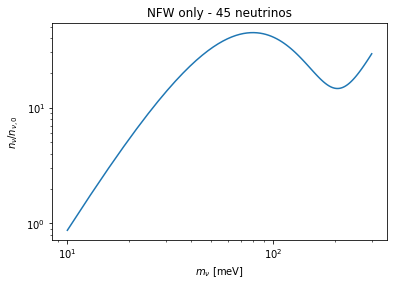

In [2]:
def number_density_1_mass(m_nu_eV):

    # Amount of simulated neutrinos
    Ns = np.arange(CC.NR_OF_NEUTRINOS, dtype=int)

    # load initial and final velocity
    u0 = [np.load(f'neutrino_vectors/nu_{Nr+1}.npy')[0][3:6] for Nr in Ns]
    u1 = [np.load(f'neutrino_vectors/nu_{Nr+1}.npy')[-1][3:6] for Nr in Ns]

    # magnitude of velocities
    a0 = np.array([np.sqrt(np.sum(u**2)) for u in np.array(u0)])
    a1 = np.array([np.sqrt(np.sum(u**2)) for u in np.array(u1)])

    # convert mass(es) from eV to kg
    m_nu_kg = m_nu_eV.to(unit.kg, unit.mass_energy())

    n_nus = np.zeros(len(m_nu_kg))
    for i, m in enumerate(m_nu_kg.value):

        # convert velocities to momenta
        p0, p1 = a0 * m, a1 * m

        #NOTE: number_density function need input momenta in units [kg*kpc/s]
        p_unit = unit.kg*unit.kpc/unit.s
        n_nus[i] = fct.number_density(p0*p_unit, p1*p_unit).value

    np.save('neutrino_data/number_densities.npy', n_nus)



# 10 to 300 meV like in the paper
mass_range_eV = np.linspace(0.01, 0.3, 100) * unit.eV

number_density_1_mass(mass_range_eV)

n_nus = np.load('neutrino_data/number_densities.npy')

neutrinos = CC.NR_OF_NEUTRINOS

n0 = 56  # standard neutrino number density
plt.loglog(mass_range_eV*1e3, (n_nus/n0))
plt.title(f'NFW only - {neutrinos} neutrinos')
plt.xlabel(r'$m_{\nu}$ [meV]')
plt.ylabel(r'$n_{\nu} / n_{\nu, 0}$')
plt.show()

## Momentum behaviour

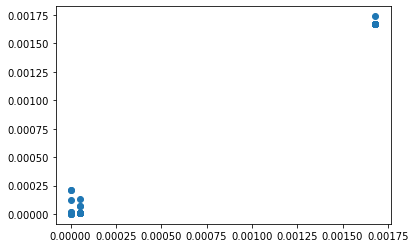

In [5]:
# Amount of simulated neutrinos
Ns = np.arange(CC.NR_OF_NEUTRINOS, dtype=int)

# load initial and final velocity
u0 = [np.load(f'neutrino_vectors/nu_{Nr+1}.npy')[0,3:6] for Nr in Ns]
u1 = [np.load(f'neutrino_vectors/nu_{Nr+1}.npy')[-1,3:6] for Nr in Ns]

# magnitude of velocities
a0 = np.array([np.sqrt(np.sum(u**2)) for u in np.array(u0)])
a1 = np.array([np.sqrt(np.sum(u**2)) for u in np.array(u1)])

# calculate momenta
m = CC.NU_MASS_KG.value
p_unit = unit.kg*unit.kpc/unit.s
p0, p1 = a0 * m * p_unit, a1 * m * p_unit

# convert momenta from kg*kpc/s to eV
to_eV = 1/(5.3442883e-28)
p0 = p0.to(unit.kg*unit.m/unit.s).value * to_eV
p1 = p1.to(unit.kg*unit.m/unit.s).value * to_eV

# they are already sorted
order = p0.argsort()


plt.scatter(p0[order], p1[order])

## Fermi-Dirac shape

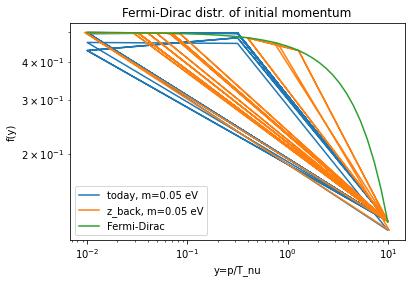

In [5]:
# Original Fermi-Dirac distr.
pOG = np.geomspace(0.01*my.T_nu_eV, 10*my.T_nu_eV, len(p0))
FDvalsOG = fct.Fermi_Dirac(pOG)
yOG = pOG/my.T_nu_eV.value

# Fermi-Dirac distr. of initial momentum (by using p1 momenta at z_back)
y0 = p0/my.T_nu_eV.value
FDvals0 = fct.Fermi_Dirac(p1)

# Fermi-Dirac distr. of final momentum
y1 = p1/my.T_nu_eV.value
FDvals1 = fct.Fermi_Dirac(p1)


plt.loglog(y0, FDvals0, label='today, m=0.05 eV')
plt.loglog(y1, FDvals1, label='z_back, m=0.05 eV')
plt.loglog(yOG, FDvalsOG, label='Fermi-Dirac')
plt.title('Fermi-Dirac distr. of initial momentum')
plt.ylabel('f(y)')
plt.xlabel('y=p/T_nu')
plt.legend(loc='lower left')
plt.savefig('check_plots/fermi_dirac_distr.pdf')